In [ ]:
import pandas as pd

tests=pd.DataFrame()
for i in range(1, 6):
    arquivo = f"/content/Testes Bonani/original_0{i}.txt"

    # Ler o arquivo de texto e criar um DataFrame temporário
    temp_df = pd.read_csv(arquivo, sep='\t', header=None, names=['tipo', 'metrica', 'valor'])

    # Adicionar as colunas 'Process_Number' e 'Percentage' ao DataFrame temporário
    temp_df['Test_Number'] = i
    temp_df['Percentage'] = 'original'
    # Anexar o DataFrame temporário ao DataFrame principal 'tests'
    tests = pd.concat([tests, temp_df], ignore_index=True)

for percent in range(0,100,10):

  for i in range(1, 6):
      arquivo = f"/content/Testes Bonani/alt_{percent}_{i}.txt"

     # Ler o arquivo de texto e criar um DataFrame temporário
      temp_df = pd.read_csv(arquivo, sep='\t', header=None, names=['tipo', 'metrica', 'valor'])

     # Adicionar as colunas 'Process_Number' e 'Percentage' ao DataFrame temporário
      temp_df['Test_Number'] = i
      temp_df['Percentage'] = percent
     # Anexar o DataFrame temporário ao DataFrame principal 'tests'
      tests = pd.concat([tests, temp_df], ignore_index=True)


In [ ]:
tests

,tipo,metrica,valor,Test_Number,Percentage
0,CPU,1,14.0667,1,original
1,CPU,3,13.8666,1,original
2,CPU,5,13.6667,1,original
3,CPU,7,13.4833,1,original
4,CPU,9,13.3000,1,original
...,...,...,...,...,...
10995,IO,120,108.6670,5,90
10996,IO,122,108.4500,5,90
10997,IO,124,108.2330,5,90
10998,IO,126,108.0000,5,90


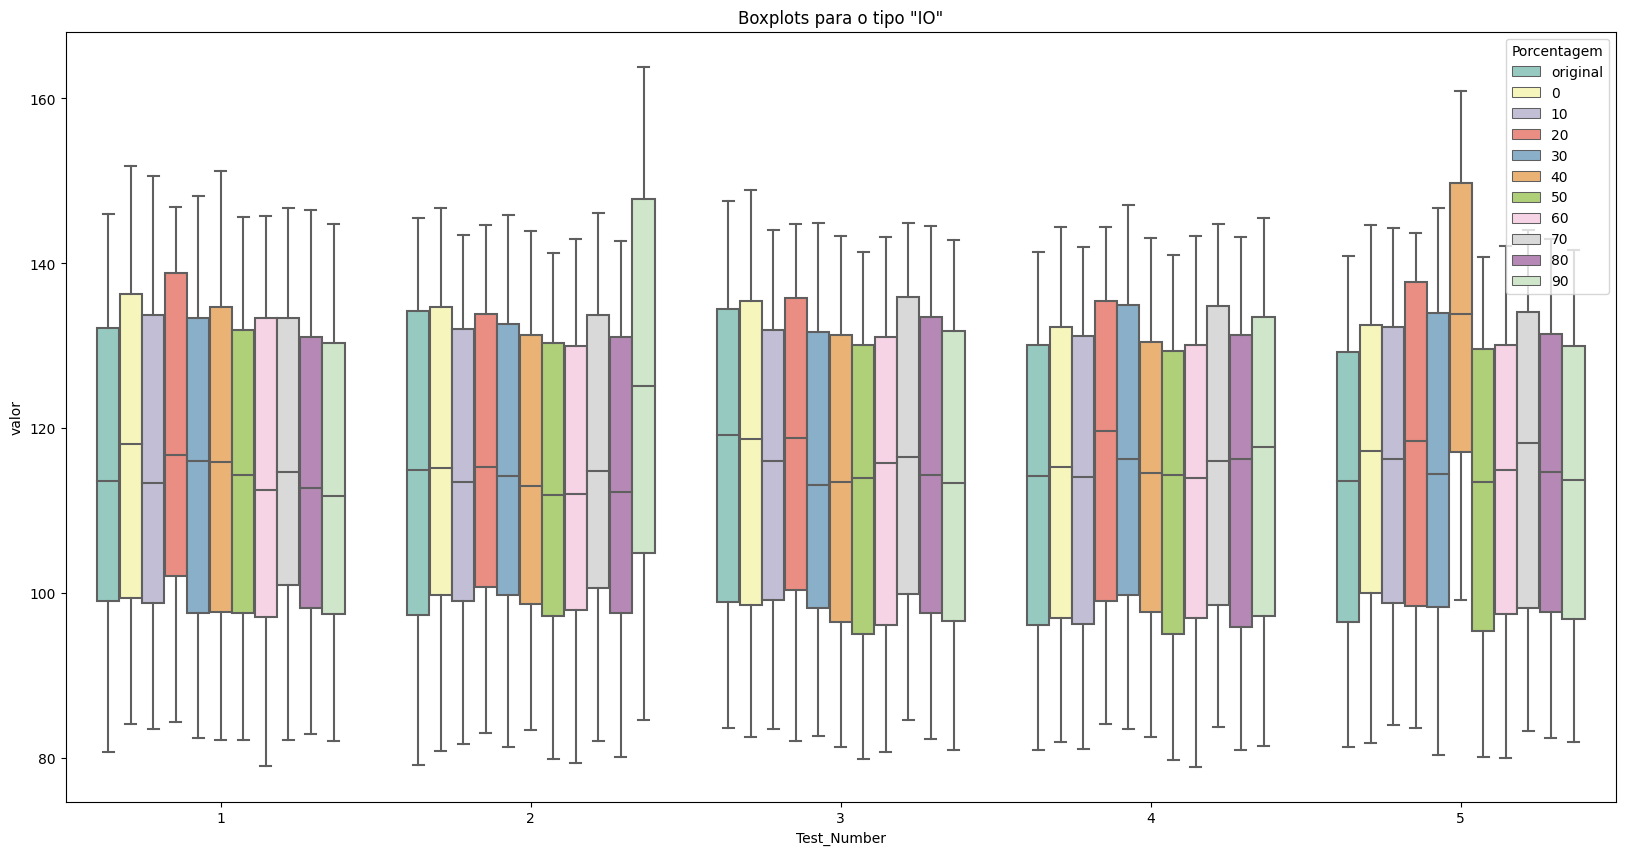

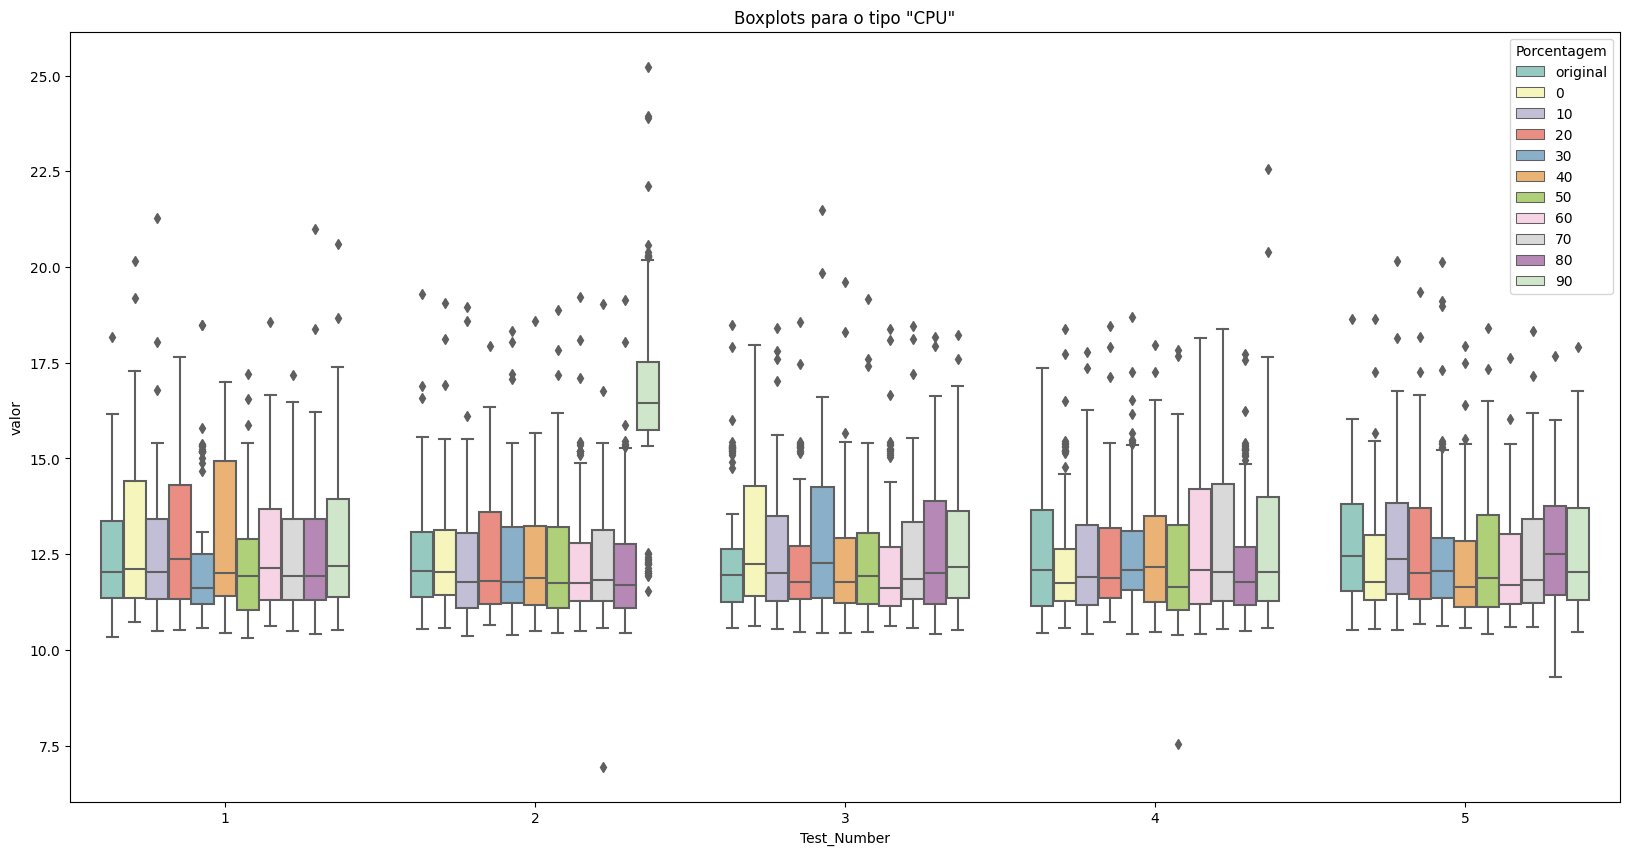

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_boxplot(data, type):
    fig = plt.figure(figsize=(20, 10))
    sns.boxplot(data=data[data['tipo'] == type], x='Test_Number', y='valor', hue='Percentage',palette='Set3')
    plt.title(f'Boxplots para o tipo "{type}"')
    plt.legend(title='Porcentagem')
    plt.show()

# Criar os boxplots para cada tipo
for type in ['IO', 'CPU']:
    create_boxplot(tests, type)


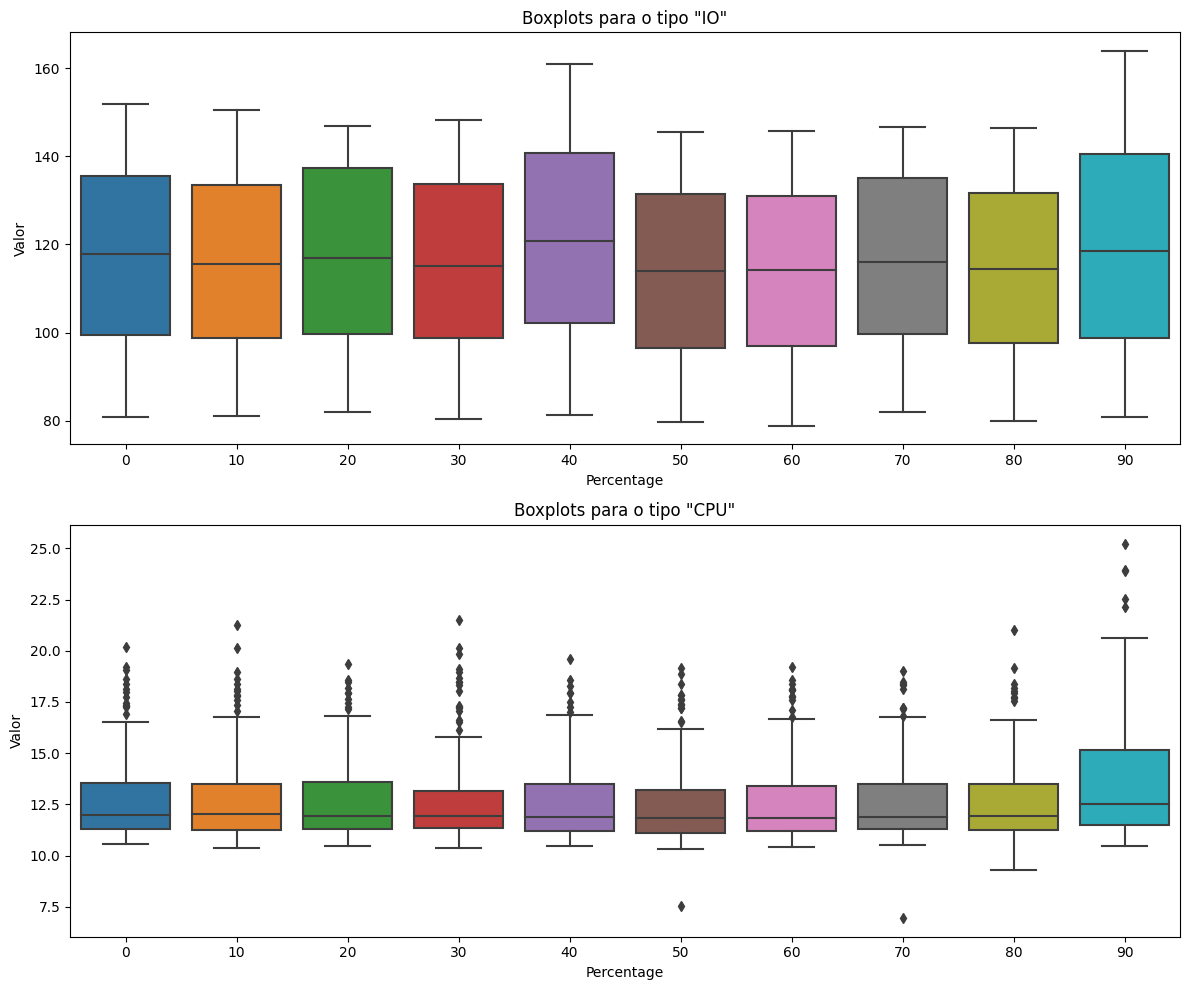

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_boxplots(data):
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))

    for i, type in enumerate(['IO', 'CPU']):
        ax = axes[i]
        sns.boxplot(data=data[data['tipo'] == type], x='Percentage', y='valor', ax=ax)
        ax.set_title(f'Boxplots para o tipo "{type}"')
        ax.set_xlabel('Percentage')
        ax.set_ylabel('Valor')

    plt.tight_layout()
    plt.show()

# Concatenar os dados de cada teste para cada percentual
concatenated_data = pd.DataFrame()

for percentage in range(0, 100, 10):
    temp_data = pd.DataFrame()

    for i in range(1, 6):
        temp_data = pd.concat([temp_data, tests[(tests['Percentage'] == percentage) & (tests['Test_Number'] == i)]])
    temp_data['Test_Number'] = 'All Tests'
    concatenated_data = pd.concat([concatenated_data, temp_data])

# Criar os boxplots para os dados concatenados
create_boxplots(concatenated_data)


<ipython-input-46-277f2a26745f>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  og_data = og_data.append(tests[(tests['Percentage'] == 'original') & (tests['Test_Number'] == i)])
<ipython-input-46-277f2a26745f>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  og_data = og_data.append(tests[(tests['Percentage'] == 'original') & (tests['Test_Number'] == i)])
<ipython-input-46-277f2a26745f>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  og_data = og_data.append(tests[(tests['Percentage'] == 'original') & (tests['Test_Number'] == i)])
<ipython-input-46-277f2a26745f>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  og_data = og_data.a

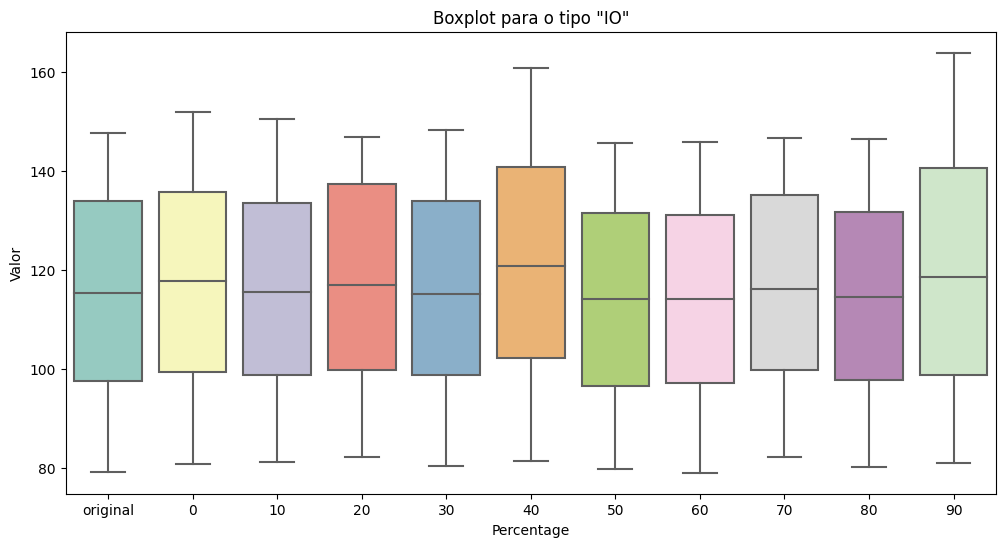

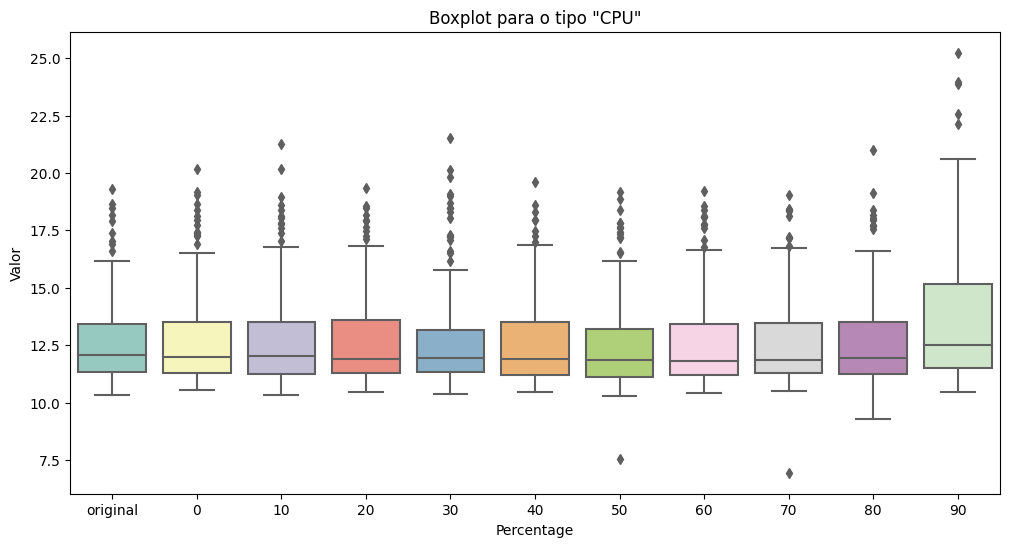

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_boxplot(data, type):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data[data['tipo'] == type], x='Percentage', y='valor', palette='Set3')
    plt.title(f'Boxplot para o tipo "{type}"')
    plt.xlabel('Percentage')
    plt.ylabel('Valor')
    plt.show()

# Concatenar os dados de cada teste para cada percentual
concatenated_data = pd.DataFrame()
og_data=pd.DataFrame()

for i in range(1, 6):
    og_data = og_data.append(tests[(tests['Percentage'] == 'original') & (tests['Test_Number'] == i)])

og_data['Test_Number'] = 'All Tests'
concatenated_data = pd.concat([concatenated_data, og_data])

for percentage in range(0, 100, 10):
    temp_data = pd.DataFrame()

    for i in range(1, 6):
        temp_data = temp_data.append(tests[(tests['Percentage'] == percentage) & (tests['Test_Number'] == i)])

    temp_data['Test_Number'] = 'All Tests'
    concatenated_data = pd.concat([concatenated_data, temp_data])

# Gerar os boxplots para os dados concatenados
for type in ['IO', 'CPU']:
    create_boxplot(concatenated_data, type)


In [ ]:
import pandas as pd

tests=pd.DataFrame()


for percent in range(25,76,25):
  for i in range(1, 6):
    arquivo = f"/content/Testes 25/original_{percent}_0{i}.txt"

    # Ler o arquivo de texto e criar um DataFrame temporário
    temp_df = pd.read_csv(arquivo, sep='\t', header=None, names=['tipo', 'metrica', 'valor'])

    # Adicionar as colunas 'Process_Number' e 'Percentage' ao DataFrame temporário
    temp_df['Test_Number'] = i
    temp_df['Processos'] = f'original_{percent}'
    # Anexar o DataFrame temporário ao DataFrame principal 'tests'
    tests = pd.concat([tests, temp_df], ignore_index=True)

  for i in range(1, 6):
      arquivo = f"/content/Testes 25/alt_{percent}_{i}.txt"

     # Ler o arquivo de texto e criar um DataFrame temporário
      temp_df = pd.read_csv(arquivo, sep='\t', header=None, names=['tipo', 'metrica', 'valor'])

     # Adicionar as colunas 'Process_Number' e 'Percentage' ao DataFrame temporário
      temp_df['Test_Number'] = i
      temp_df['Processos'] = f'alterado_{percent}'
     # Anexar o DataFrame temporário ao DataFrame principal 'tests'
      tests = pd.concat([tests, temp_df], ignore_index=True)

In [ ]:
tests

,tipo,metrica,valor,Test_Number,Processos
0,IO,18,7.06668,1,original_25
1,IO,20,6.85000,1,original_25
2,IO,22,6.63335,1,original_25
3,IO,14,7.50000,1,original_25
4,IO,24,6.43335,1,original_25
...,...,...,...,...,...
1495,IO,66,19.98330,5,alterado_75
1496,IO,68,19.76670,5,alterado_75
1497,IO,70,19.55000,5,alterado_75
1498,IO,72,16.18330,5,alterado_75


<ipython-input-51-105d3b26cbcf>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_data = temp_data.append(tests[(tests['Processos'] == f'original_{percentage}') & (tests['Test_Number'] == i)])
<ipython-input-51-105d3b26cbcf>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_data = temp_data.append(tests[(tests['Processos'] == f'original_{percentage}') & (tests['Test_Number'] == i)])
<ipython-input-51-105d3b26cbcf>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_data = temp_data.append(tests[(tests['Processos'] == f'original_{percentage}') & (tests['Test_Number'] == i)])
<ipython-input-51-105d3b26cbcf>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

    tipo  metrica     valor Test_Number    Processos
0     IO       18   7.06668   All Tests  original_25
1     IO       20   6.85000   All Tests  original_25
2     IO       22   6.63335   All Tests  original_25
3     IO       14   7.50000   All Tests  original_25
4     IO       24   6.43335   All Tests  original_25
..   ...      ...       ...         ...          ...
120  CPU       19   8.36668   All Tests  original_25
121  CPU       13  10.71670   All Tests  original_25
122  CPU       15   9.35000   All Tests  original_25
123  CPU       21   8.75000   All Tests  original_25
124  CPU       23   8.61668   All Tests  original_25

[125 rows x 5 columns]
    tipo  metrica    valor Test_Number    Processos
250  CPU        1  14.0167   All Tests  original_50
251  CPU        3  13.8667   All Tests  original_50
252  CPU        5  13.7000   All Tests  original_50
253  CPU        7  13.5667   All Tests  original_50
254  CPU        9  13.4167   All Tests  original_50
..   ...      ...      ...  

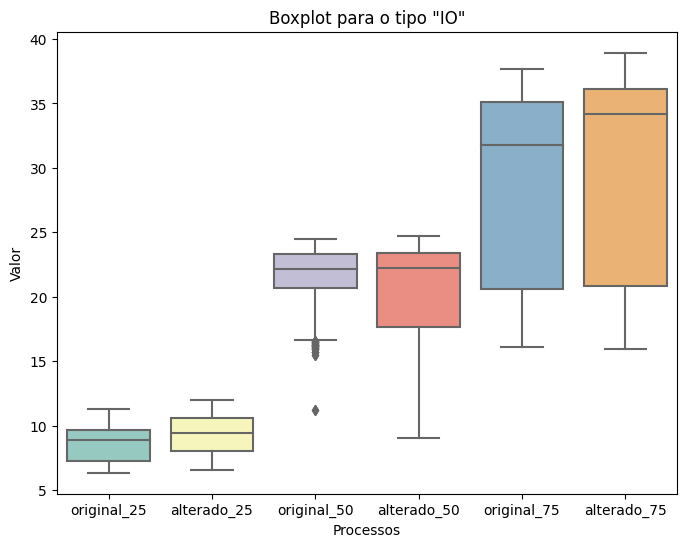

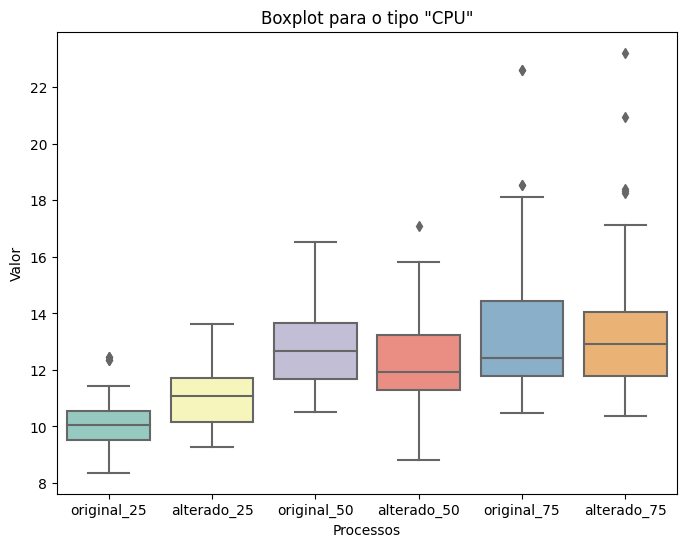

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_boxplot(data, type):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data[data['tipo'] == type], x='Processos', y='valor', palette='Set3')
    plt.title(f'Boxplot para o tipo "{type}"')
    plt.xlabel('Processos')
    plt.ylabel('Valor')
    plt.show()

# Concatenar os dados de cada teste para cada percentual
concatenated_data = pd.DataFrame()
for percentage in [25, 50, 75]:
    temp_data = pd.DataFrame()

    for i in range(1, 6):
        temp_data = temp_data.append(tests[(tests['Processos'] == f'original_{percentage}') & (tests['Test_Number'] == i)])

    temp_data['Test_Number'] = 'All Tests'
    print(temp_data)
    concatenated_data = pd.concat([concatenated_data, temp_data])

    for i in range(1, 6):
        temp_data = temp_data.append(tests[(tests['Processos'] == f'alterado_{percentage}') & (tests['Test_Number'] == i)])

    temp_data['Test_Number'] = 'All Tests'
    concatenated_data = pd.concat([concatenated_data, temp_data])

# Gerar os boxplots para os dados concatenados
for type in ['IO', 'CPU']:
    create_boxplot(concatenated_data, type)



In [ ]:
import pandas as pd

tests=pd.DataFrame()
for i in range(1, 4):
    arquivo = f"/content/Teste Edu/original_{i}.txt"

    # Ler o arquivo de texto e criar um DataFrame temporário
    temp_df = pd.read_csv(arquivo, sep='\t', header=None, names=['tipo', 'metrica', 'valor'])

    # Adicionar as colunas 'Process_Number' e 'Percentage' ao DataFrame temporário
    temp_df['Test_Number'] = i
    temp_df['Percentage'] = 'original'
    # Anexar o DataFrame temporário ao DataFrame principal 'tests'
    tests = pd.concat([tests, temp_df], ignore_index=True)

for percent in range(0,100,10):

  for i in range(1, 4):
      arquivo = f"/content/Teste Edu/alt_{percent}_{i}.txt"

     # Ler o arquivo de texto e criar um DataFrame temporário
      temp_df = pd.read_csv(arquivo, sep='\t', header=None, names=['tipo', 'metrica', 'valor'])

     # Adicionar as colunas 'Process_Number' e 'Percentage' ao DataFrame temporário
      temp_df['Test_Number'] = i
      temp_df['Percentage'] = percent
     # Anexar o DataFrame temporário ao DataFrame principal 'tests'
      tests = pd.concat([tests, temp_df], ignore_index=True)

<ipython-input-54-277f2a26745f>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  og_data = og_data.append(tests[(tests['Percentage'] == 'original') & (tests['Test_Number'] == i)])
<ipython-input-54-277f2a26745f>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  og_data = og_data.append(tests[(tests['Percentage'] == 'original') & (tests['Test_Number'] == i)])
<ipython-input-54-277f2a26745f>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  og_data = og_data.append(tests[(tests['Percentage'] == 'original') & (tests['Test_Number'] == i)])
<ipython-input-54-277f2a26745f>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  og_data = og_data.a

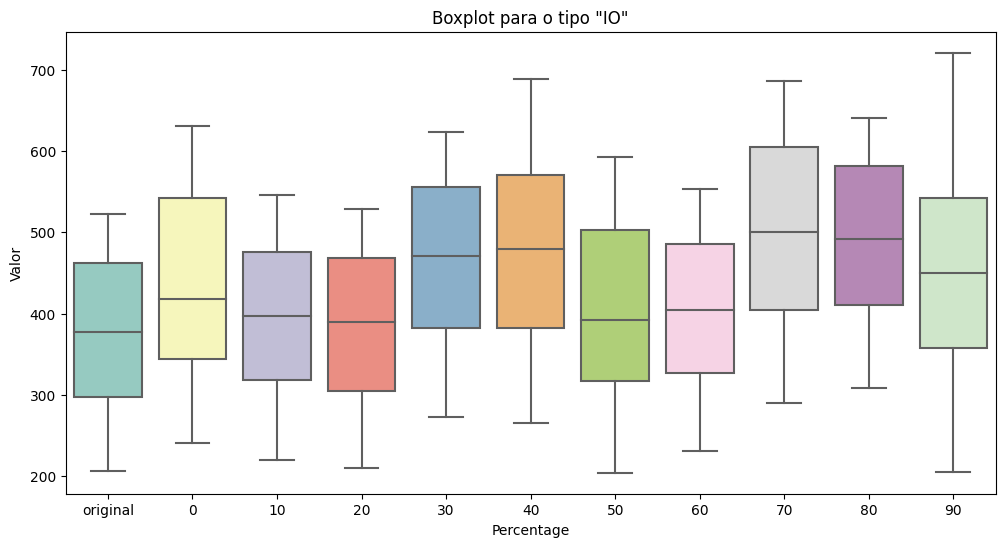

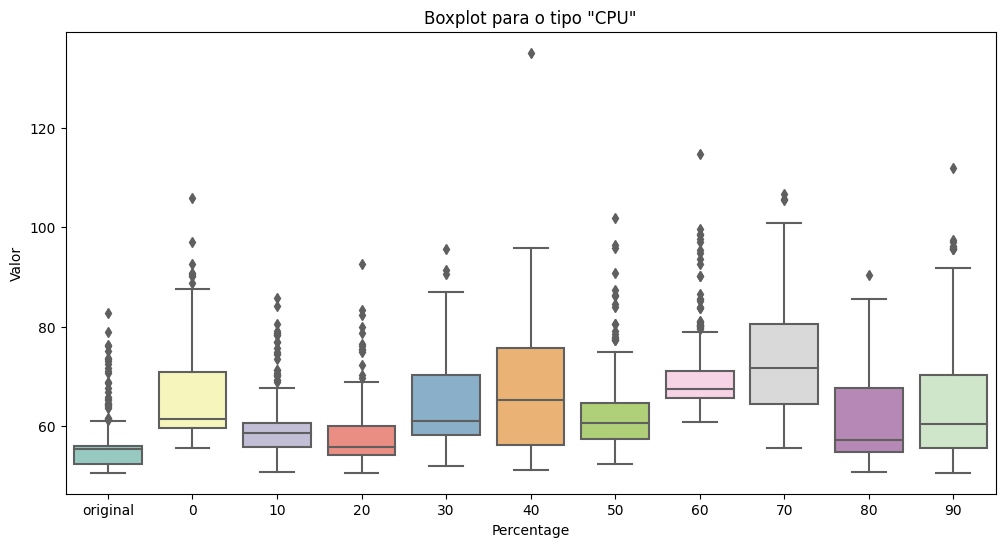

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_boxplot(data, type):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data[data['tipo'] == type], x='Percentage', y='valor', palette='Set3')
    plt.title(f'Boxplot para o tipo "{type}"')
    plt.xlabel('Percentage')
    plt.ylabel('Valor')
    plt.show()

# Concatenar os dados de cada teste para cada percentual
concatenated_data = pd.DataFrame()
og_data=pd.DataFrame()

for i in range(1, 6):
    og_data = og_data.append(tests[(tests['Percentage'] == 'original') & (tests['Test_Number'] == i)])

og_data['Test_Number'] = 'All Tests'
concatenated_data = pd.concat([concatenated_data, og_data])

for percentage in range(0, 100, 10):
    temp_data = pd.DataFrame()

    for i in range(1, 6):
        temp_data = temp_data.append(tests[(tests['Percentage'] == percentage) & (tests['Test_Number'] == i)])

    temp_data['Test_Number'] = 'All Tests'
    concatenated_data = pd.concat([concatenated_data, temp_data])

# Gerar os boxplots para os dados concatenados
for type in ['IO', 'CPU']:
    create_boxplot(concatenated_data, type)